___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Tensorflow Project 
Let's wrap up this Deep Learning by taking a a quick look at the effectiveness of Neural Nets!

We'll use the [Bank Authentication Data Set](https://archive.ics.uci.edu/ml/datasets/banknote+authentication) from the UCI repository.

The data consists of 5 columns:

* variance of Wavelet Transformed image (continuous)
* skewness of Wavelet Transformed image (continuous)
* curtosis of Wavelet Transformed image (continuous)
* entropy of image (continuous)
* class (integer)

Where class indicates whether or not a Bank Note was authentic.

This sort of task is perfectly suited for Neural Networks and Deep Learning! Just follow the instructions below to get started!

## Get the Data

** Use pandas to read in the bank_note_data.csv file **

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
bank = pd.read_csv('bank_note_data.csv')

** Check the head of the Data **

In [3]:
bank.head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


## EDA

We'll just do a few quick plots of the data.

** Import seaborn and set matplolib inline for viewing **

** Create a Countplot of the Classes (Authentic 1 vs Fake 0) **

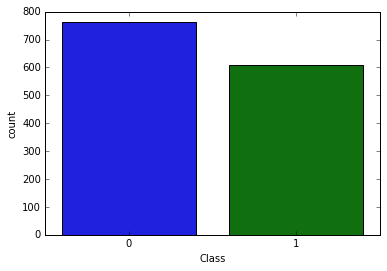

In [4]:
sns.countplot(data = bank, x = 'Class')

** Create a PairPlot of the Data with Seaborn, set Hue to Class **

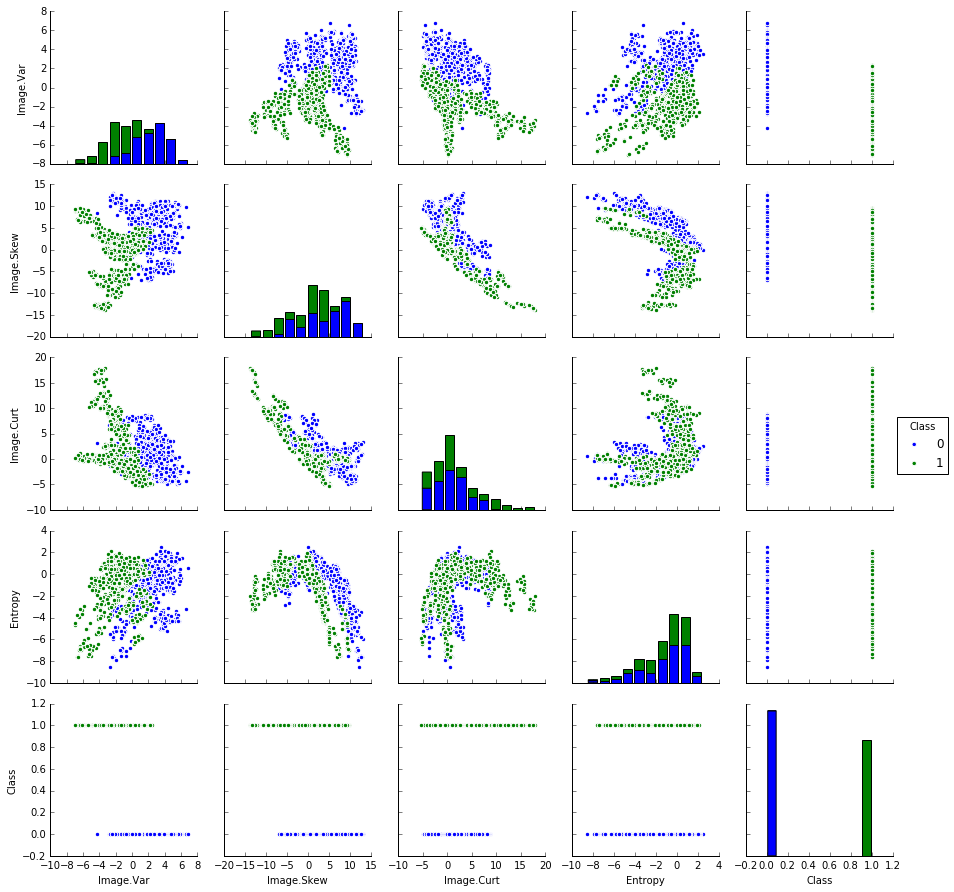

In [5]:
sns.pairplot(data = bank, hue = 'Class')

## Data Preparation 

When using Neural Network and Deep Learning based systems, it is usually a good idea to Standardize your data, this step isn't actually necessary for our particular data set, but let's run through it for practice!

### Standard Scaling

** Import StandardScaler() from SciKit Learn**

In [6]:
from sklearn.preprocessing import StandardScaler

**Create a StandardScaler() object called scaler.**

In [7]:
scaler = StandardScaler()

**Fit scaler to the features.**

In [8]:
scaler.fit(bank.drop(['Class'], axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

**Use the .transform() method to transform the features to a scaled version.**

In [9]:
bankf = scaler.transform(bank.drop(['Class'], axis=1))

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [12]:
df_bank = pd.DataFrame(data = bankf, columns = bank.columns[:-1])

In [13]:
df_bank.head()

,Image.Var,Image.Skew,Image.Curt,Entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587


## Train Test Split

** Create two objects X and y which are the scaled feature values and labels respectively.**

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = df_bank

In [17]:
y = bank['Class']

In [19]:
X = X.as_matrix()
y = y.as_matrix()

** Use the .as_matrix() method on X and Y and reset them equal to this result. We need to do this in order for TensorFlow to accept the data in Numpy array form instead of a pandas series. **

** Use SciKit Learn to create training and testing sets of the data as we've done in previous lectures:**

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Contrib.learn

** Import tensorflow.contrib.learn.python.learn as learn**

In [23]:
import tensorflow.contrib.learn as skflow

In [43]:
classifier = skflow.DNNClassifier(hidden_units = [10, 20, 20, 10], n_classes = 2, feature_columns = feature_columns)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_is_chief': True, '_num_ps_replicas': 0, '_save_checkpoints_steps': None, '_evaluation_master': '', '_session_config': None, '_save_summary_steps': 100, '_master': '', '_model_dir': '/tmp/tmpa0kfvfm5', '_task_id': 0, '_keep_checkpoint_max': 5, '_num_worker_replicas': 0, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_tf_random_seed': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fef896b0710>, '_save_checkpoints_secs': 600, '_environment': 'local', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_task_type': None}


** Create an object called classifier which is a DNNClassifier from learn. Set it to have 2 classes and a [10,20,10] hidden unit layer structure:**

In [22]:
feature_columns = skflow.infer_real_valued_columns_from_input(X_train)

** Now fit classifier to the training data. Use steps=200 with a batch_size of 20. You can play around with these values if you want!**

*Note: Ignore any warnings you get, they won't effect your output*

In [44]:
classifier.fit(X_train, y_train, steps = 10000, batch_size = 32)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpa0kfvfm5/model.ckpt.
INFO:tensorflow:loss = 0.689401, step = 1
INFO:tensorflow:global_step/sec: 839.882
INFO:tensorflow:loss = 0.0647135, step = 101 (0.120 sec)
INFO:tensorflow:global_step/sec: 1073.15
INFO:tensorflow:loss = 0.0108168, step = 201 (0.093 sec)
INFO:tensorflow:global_step/sec: 1127.75
INFO:tensorflow:loss = 0.00631166, step = 301 (0.089 sec)
INFO:tensorflow:global_step/sec: 1029.54
INFO:tensorflow:loss = 0.00110684, step = 401 (0.097 sec)
INFO:tensorflow:global_step/sec: 1021.49
INFO:tensorflow:loss = 0.000558252, step = 501 (0.098 sec)
INFO:tensorflow:global_step/sec: 1006.44
INFO:tensorflow:loss = 0.000421016, step = 601 (0.100 sec)
INFO:tensorflow:global_step/sec: 1070.78
INFO:tensorflow:loss = 0.00190295, step = 701 (0.092 sec)
INFO:tensorflow:global_step/sec: 996.175
INFO:tensorflow:loss = 0.000808133, step = 801 (0.100 sec)
INFO:tensorflow:global_step/sec: 1084.79
INFO:

INFO:tensorflow:global_step/sec: 1055.68
INFO:tensorflow:loss = 6.44072e-06, step = 7901 (0.095 sec)
INFO:tensorflow:global_step/sec: 1107.6
INFO:tensorflow:loss = 1.88125e-05, step = 8001 (0.090 sec)
INFO:tensorflow:global_step/sec: 1059.52
INFO:tensorflow:loss = 1.13104e-05, step = 8101 (0.094 sec)
INFO:tensorflow:global_step/sec: 1059.26
INFO:tensorflow:loss = 2.7036e-06, step = 8201 (0.094 sec)
INFO:tensorflow:global_step/sec: 1039.05
INFO:tensorflow:loss = 4.0271e-06, step = 8301 (0.096 sec)
INFO:tensorflow:global_step/sec: 1078.93
INFO:tensorflow:loss = 9.85746e-05, step = 8401 (0.093 sec)
INFO:tensorflow:global_step/sec: 1103.44
INFO:tensorflow:loss = 3.52731e-06, step = 8501 (0.091 sec)
INFO:tensorflow:global_step/sec: 1064.76
INFO:tensorflow:loss = 0.00011789, step = 8601 (0.094 sec)
INFO:tensorflow:global_step/sec: 1055.03
INFO:tensorflow:loss = 0.000124789, step = 8701 (0.095 sec)
INFO:tensorflow:global_step/sec: 1094.93
INFO:tensorflow:loss = 2.83028e-05, step = 8801 (0.091

DNNClassifier(params={'embedding_lr_multipliers': None, 'optimizer': None, 'dropout': None, 'activation_fn': <function relu at 0x7fef8c0a27b8>, 'feature_columns': (_RealValuedColumn(column_name='', dimension=4, default_value=None, dtype=tf.float64, normalizer=None),), 'input_layer_min_slice_size': None, 'gradient_clip_norm': None, 'hidden_units': [10, 20, 20, 10], 'head': <tensorflow.contrib.learn.python.learn.estimators.head._BinaryLogisticHead object at 0x7fef896b01d0>})

## Model Evaluation

** Use the predict method from the classifier model to create predictions from X_test **

In [45]:
predictions = list(classifier.predict(X_test, as_iterable = True))

INFO:tensorflow:Restoring parameters from /tmp/tmpa0kfvfm5/model.ckpt-10000


** Now create a classification report and a Confusion Matrix. Does anything stand out to you?**

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

In [46]:
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       257
          1       1.00      1.00      1.00       196

avg / total       1.00      1.00      1.00       453

[[257   0]
 [  0 196]]


[[237   0]
 [  1 174]]


             precision    recall  f1-score   support

          0       1.00      1.00      1.00       237
          1       1.00      0.99      1.00       175

avg / total       1.00      1.00      1.00       412



## Optional Comparison

** You should have noticed extremely accurate results from the DNN model. Let's compare this to a Random Forest Classifier for a reality check!**

**Use SciKit Learn to Create a Random Forest Classifier and compare the confusion matrix and classification report to the DNN model**

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
rf = RandomForestClassifier()

In [39]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [40]:
rpred = rf.predict(X_test)

In [41]:
print(classification_report(y_test, rpred))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99       257
          1       0.99      0.98      0.99       196

avg / total       0.99      0.99      0.99       453



In [42]:
print(confusion_matrix(y_test, rpred))

[[256   1]
 [  3 193]]


** It should have also done very well, but not quite as good as the DNN model. Hopefully you have seen the power of DNN! **

# Great Job!